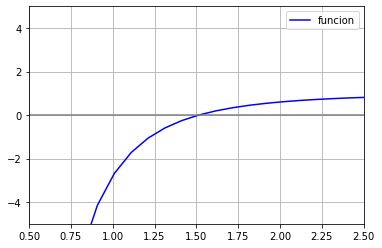

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def h(x):
    return (1-(400/(9.81*( (3*x+((x**2)/2))**3)))*((3+x)))
v = [0.5,2.5,-5,5]
np.seterr(divide='ignore', invalid='ignore')
x=np.linspace(0,10,100)
plt.plot(x,h(x),'blue',label='funcion')
plt.axhline(0, color="gray")

plt.legend(loc=1)
plt.axis(v)
plt.grid()


In [5]:
# METODO DE BISECCIÓN
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np



#Calcular la raiz real de la ecuación f(x)=xe^x - pi = 0. Suponer que se desea que el error sea menor que e=0.000001
def f(x): return (1-(400/(9.81*( (3*x+((x**2)/2))**3)))*((3+x)))
a=0.5
b=2.5
e=0.01
r=0
S=[a]
Error=[1]
relativo = [np.absolute((b-a)/(b))]
Conv = []
while relativo[r]>=e and r<=10 :
    print("Iteración : ",r,"-",10)
    r = r+1
    c=(a+b)/2
    print("La solución aproximada en la i-esima iteración es x=",c)
    if f(c)==0:
        print("La solución obtiene en x=",c)
    else:
        if f(a)*f(c)>0:
            a=c
        else:
            b=c
    Anterior = r-1
    S.append(c)
    absoluto = np.absolute(S[r]-S[Anterior])
    rela = np.absolute((S[r]-S[Anterior])/S[r])
    relativo.append(rela)
    Error.append(absoluto)
    Razon = (Error[r]/Error[1])
    Conv.append(Razon)
    print("Error absoluto =",absoluto)
    #print("Error relativo =",relativo[r])
    #print("Razón convergencia =",Conv)
    print("------------------------------------------")

Iteración :  0 - 10
La solución aproximada en la i-esima iteración es x= 1.5
Error absoluto = 1.0
------------------------------------------
Iteración :  1 - 10
La solución aproximada en la i-esima iteración es x= 2.0
Error absoluto = 0.5
------------------------------------------
Iteración :  2 - 10
La solución aproximada en la i-esima iteración es x= 1.75
Error absoluto = 0.25
------------------------------------------
Iteración :  3 - 10
La solución aproximada en la i-esima iteración es x= 1.625
Error absoluto = 0.125
------------------------------------------
Iteración :  4 - 10
La solución aproximada en la i-esima iteración es x= 1.5625
Error absoluto = 0.0625
------------------------------------------
Iteración :  5 - 10
La solución aproximada en la i-esima iteración es x= 1.53125
Error absoluto = 0.03125
------------------------------------------
Iteración :  6 - 10
La solución aproximada en la i-esima iteración es x= 1.515625
Error absoluto = 0.015625
--------------------------

In [4]:
# METODO FALSA POSICION
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np


def f(x): return (1-(400/(9.81*( (3*x+((x**2)/2))**3)))*((3+x)))
Estado = 'True'
xi=0.5
xu=2.5
xr=0.5
e=0.01
i = 0
il = 0
iu = 0
fi=f(xi)
fu=f(xu)
imax = 10

while Estado == 'True' :
    xrant=xr
    xr = xu-fu*(xi-xu)/(fi-fu)
    fr=f(xr)
    i = i + 1
    print("Iteración : ",i,"-",imax)
    if xr != 0:
        eabs = np.absolute((xr-xrant)/(xr))
        print("Error Abs : ",eabs)
    test = fi*fr
    print(fi," / ",fr," / ",fu)
    if test < 0:
        xu = xr
        fu = f(xu)
    else:
        xi = xr
        fi = f(xi)
    if i >= imax or eabs <= e:
        Estado = 'False'
        if eabs < e:
            print("El error alcanzo el 1%")
    print("La solución aproximada en la i-esima iteración es x=",xr)
    print("------------------------------------------")

    
    
    

Iteración :  1 - 10
Error Abs :  0.7959876047306351
-32.258214681590175  /  0.7998732909044218  /  0.8130321830223047
La solución aproximada en la i-esima iteración es x= 2.4508314768807655
------------------------------------------
Iteración :  2 - 10
Error Abs :  0.019637932029769514
-32.258214681590175  /  0.7861233019120436  /  0.7998732909044218
La solución aproximada en la i-esima iteración es x= 2.403629170603679
------------------------------------------
Iteración :  3 - 10
Error Abs :  0.01920300498660325
-32.258214681590175  /  0.7717920956618608  /  0.7861233019120436
La solución aproximada en la i-esima iteración es x= 2.3583419189735153
------------------------------------------
Iteración :  4 - 10
Error Abs :  0.018757780745838667
-32.258214681590175  /  0.7568937949442244  /  0.7717920956618608
La solución aproximada en la i-esima iteración es x= 2.3149191726878975
------------------------------------------
Iteración :  5 - 10
Error Abs :  0.01830293204351577
-32.2582146

In [33]:
# METODO FALSA POSICION MODIFICADA
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np


def f(x): return (1-(400/(9.81*( (3*x+((x**2)/2))**3)))*((3+x)))
Estado = 'True'
xi=0.5
xu=2.5
xr=0
e=1
i = 0
il = 0
iu = 0
fi=f(xi)
fu=f(xu)
imax = 10

while Estado == 'True' :
    xrant=xr
    xr = xu-fu*(xi-xu)/(fi-fu)
    fr=f(xr)
    i = i + 1
    print("Iteración : ",i,"-",imax)
    if xr != 0:
        eabs = np.absolute((xr-xrant)/(xr))*100
        print(eabs)
    test = fi*fr
    print(fi," / ",fr," / ",fu)
    if test < 0:
        xu = xr
        fu = f(xu)
        iu = 0
        il = il + 1
        if il >= 2:
            fi=fi/2
    else:
        xi = xr
        fi = f(xi)
        il = 0
        iu = iu + 1
        if iu >= 2 :
            fu=fu/2
        else:
            ea = 0
    if i >= imax or eabs <= e:
        Estado = 'False'
        if eabs < e:
            print("El error alcanzo el 1%")
            
    print("La solución aproximada en la i-esima iteración es x=",xr)
    print("----------------------------------------------------------------")
    



Iteración :  1 - 10
100.0
-32.258214681590175  /  0.7998732909044218  /  0.8130321830223047
La solución aproximada en la i-esima iteración es x= 2.4508314768807655
----------------------------------------------------------------
Iteración :  2 - 10
1.9637932029769514
-32.258214681590175  /  0.7861233019120436  /  0.7998732909044218
La solución aproximada en la i-esima iteración es x= 2.403629170603679
----------------------------------------------------------------
Iteración :  3 - 10
3.8213270328321705
-16.129107340795088  /  0.7569795283164076  /  0.7861233019120436
La solución aproximada en la i-esima iteración es x= 2.315159360122186
----------------------------------------------------------------
Iteración :  4 - 10
7.213096996955555
-8.064553670397544  /  0.6923149683738206  /  0.7569795283164076
La solución aproximada en la i-esima iteración es x= 2.159399760822064
----------------------------------------------------------------
Iteración :  5 - 10
12.68937966775941
-4.032276835